In [1]:
import pyspark

In [2]:
# PYSPARK_DRIVER_PYTHON="jupyter" PYSPARK_DRIVER_PYTHON_OPTS="notebook" ~/Projects/spark-projects/spark-2.2.1-bin-hadoop2.7/bin/pyspark
# sc = pyspark.SparkContext()
print sc

<SparkContext master=local[*] appName=PySparkShell>


In [3]:
print sc.appName
print sc.applicationId

PySparkShell
local-1520381154992


In [4]:
print sc.sparkHome
sc.sparkUser()

None


u'mprakash'

In [5]:
sc.uiWebUrl

u'http://10.0.4.101:4040'

In [6]:
from pyspark.sql import SparkSession, SQLContext


In [7]:
sqlcontext = SQLContext(sc)

In [8]:
spark=sqlContext.sparkSession

In [9]:
print spark

In [10]:
comm_data = spark.read.csv("../data/mp_comm_volume.csv", header="true",inferSchema="true")

In [11]:
comm_data.columns

['Comm_Date', 'ReceivedComms', 'SentComms']

In [12]:
comm_data.count()

444

In [13]:
comm_data.describe(['ReceivedComms']).show()

+-------+------------------+
|summary|     ReceivedComms|
+-------+------------------+
|  count|               444|
|   mean|19.186936936936938|
| stddev|17.226645081224586|
|    min|                 0|
|    max|                80|
+-------+------------------+



In [14]:
comm_data.describe(['SentComms']).show()

+-------+-----------------+
|summary|        SentComms|
+-------+-----------------+
|  count|              444|
|   mean|5.405405405405405|
| stddev|5.315556416393526|
|    min|                0|
|    max|               30|
+-------+-----------------+



In [15]:
import matplotlib.pyplot as plt
import pandas

In [16]:
comm_data.printSchema

<bound method DataFrame.printSchema of DataFrame[Comm_Date: timestamp, ReceivedComms: int, SentComms: int]>

In [17]:
# date_date = spark.sql("SELECT Comm_Date AS f1 from comm_data order by Comm_Date")
# date_date.show(4)
# comm_data.sort("Comm_Date").

In [18]:
comm_data.createOrReplaceTempView("mpcomms")

In [19]:
whendf = spark.sql("SELECT Comm_Date as ft1,ReceivedComms as xrecv, SentComms as xsent from mpcomms order by Comm_Date desc")

In [20]:
whendf.take(3)

[Row(ft1=datetime.datetime(2017, 6, 6, 0, 0), xrecv=41, xsent=8),
 Row(ft1=datetime.datetime(2017, 6, 5, 0, 0), xrecv=48, xsent=12),
 Row(ft1=datetime.datetime(2017, 6, 4, 0, 0), xrecv=2, xsent=1)]

In [21]:
whendf2 = spark.sql("SELECT Comm_Date as ft1, ReceivedComms as xrecv, SentComms as xsent from mpcomms order by Comm_Date")


In [22]:
whendf2.take(10)

[Row(ft1=datetime.datetime(2015, 10, 15, 0, 0), xrecv=31, xsent=8),
 Row(ft1=datetime.datetime(2015, 10, 23, 0, 0), xrecv=4, xsent=2),
 Row(ft1=datetime.datetime(2015, 10, 30, 0, 0), xrecv=1, xsent=0),
 Row(ft1=datetime.datetime(2015, 11, 25, 0, 0), xrecv=4, xsent=2),
 Row(ft1=datetime.datetime(2015, 12, 21, 0, 0), xrecv=11, xsent=1),
 Row(ft1=datetime.datetime(2015, 12, 25, 0, 0), xrecv=0, xsent=1),
 Row(ft1=datetime.datetime(2015, 12, 29, 0, 0), xrecv=0, xsent=1),
 Row(ft1=datetime.datetime(2016, 1, 5, 0, 0), xrecv=1, xsent=1),
 Row(ft1=datetime.datetime(2016, 1, 6, 0, 0), xrecv=0, xsent=1),
 Row(ft1=datetime.datetime(2016, 1, 8, 0, 0), xrecv=0, xsent=1)]

In [23]:
from pyspark.sql.functions import *

In [24]:
whendf3 = whendf2.filter(whendf2.ft1 > to_date(lit("2016-1-1")))

In [25]:
whendf3.take(6)

[Row(ft1=datetime.datetime(2016, 1, 5, 0, 0), xrecv=1, xsent=1),
 Row(ft1=datetime.datetime(2016, 1, 6, 0, 0), xrecv=0, xsent=1),
 Row(ft1=datetime.datetime(2016, 1, 8, 0, 0), xrecv=0, xsent=1),
 Row(ft1=datetime.datetime(2016, 1, 11, 0, 0), xrecv=3, xsent=1),
 Row(ft1=datetime.datetime(2016, 1, 12, 0, 0), xrecv=0, xsent=1),
 Row(ft1=datetime.datetime(2016, 1, 14, 0, 0), xrecv=1, xsent=0)]

In [26]:
import matplotlib.pyplot as plt
import pandas as pad
import numpy as np
%matplotlib inline

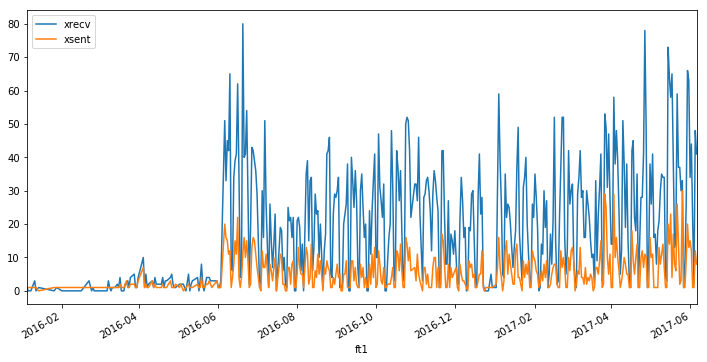

In [27]:
pdf1 = whendf3.toPandas()
pdf1.plot(x='ft1', figsize=(12,6))

In [28]:
pdf1.dtypes

ft1      datetime64[ns]
xrecv             int64
xsent             int64
dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f409f11d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f1f40c7c590>], dtype=object)

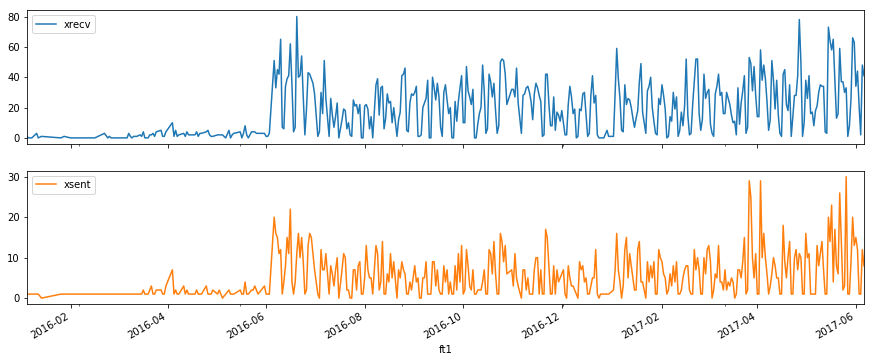

In [29]:
pdf1.plot(x='ft1', figsize=(15,6), subplots=True)

In [30]:
pdf1.index = pdf1['ft1']

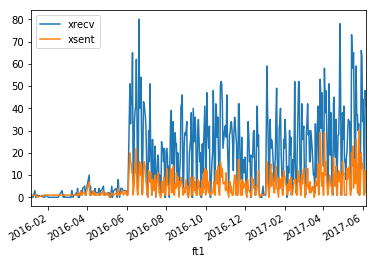

In [31]:
pdf1.plot()

In [32]:
pdf2 = pdf1['2016-06': '2017-06']
del pdf2['ft1']

In [33]:
pdf2.head()

,xrecv,xsent
ft1,,
2016-06-01,1,1
2016-06-02,1,1
2016-06-03,3,1
2016-06-06,51,20
2016-06-07,33,16


In [34]:
pdf3 = pdf2.resample('D')


/home/mprakash/anaconda2/envs/supervision2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


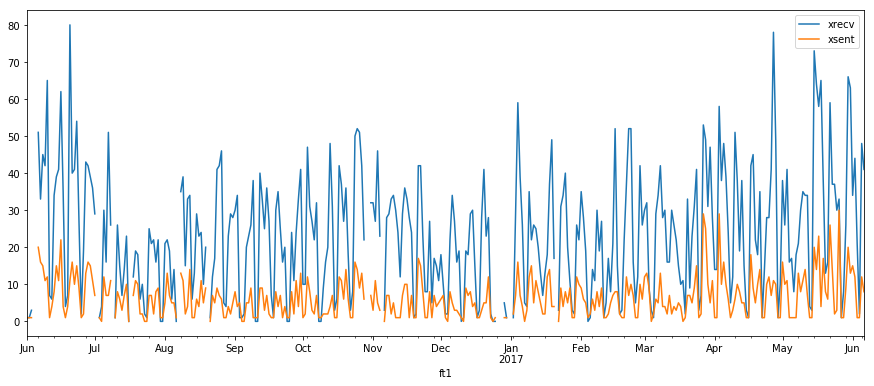

In [35]:
pdf3.plot(figsize=(15,6))

In [37]:
# pdf4 = pdf3.fillna(0, axis=1)
# pdf4.head()

In [38]:
# pdf3.isnull()

In [39]:
pad.__version__

u'0.19.2'

In [40]:
pdf3.head()

/home/mprakash/anaconda2/envs/supervision2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


,xrecv,xsent
ft1,,
2016-06-01,1.0,1.0
2016-06-02,1.0,1.0
2016-06-03,3.0,1.0
2016-06-04,NaN,NaN
2016-06-05,NaN,NaN


In [41]:
pdf4 = pdf3.replace(np.nan, 0)

/home/mprakash/anaconda2/envs/supervision2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called replace(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


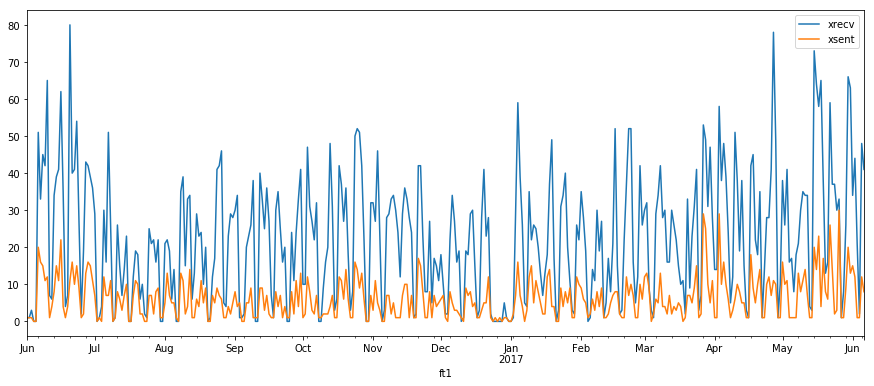

In [42]:
pdf4.plot(figsize=(15,6))

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

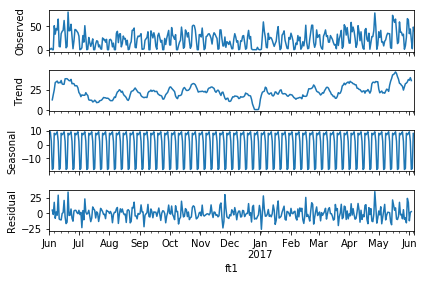

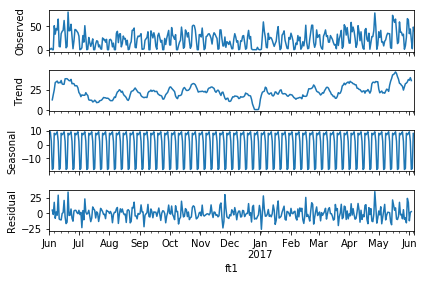

In [44]:
result = seasonal_decompose(pdf4['xrecv'], model="additive")
result.plot()

In [45]:
# result.seasonal
testar1 = np.ones(5)/float(5)
testar1
testar2 = np.array([1, 10, 100, 1000, 10000])
testar2

np.convolve(testar2, testar1, 'same')

array([   22.2,   222.2,  2222.2,  2222. ,  2220. ])

In [46]:
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

def explain_anomalies_rolling_std(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using rolling standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation

    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
        containing information about the points indentified as anomalies
    """
    avg = moving_average(y, window_size)
    avg_list = avg.tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    testing_std = pd.rolling_std(residual, window_size)
    testing_std_as_df = pd.DataFrame(testing_std)
    rolling_std = testing_std_as_df.replace(np.nan,
                                  testing_std_as_df.ix[window_size - 1]).round(3).iloc[:,0].tolist()
    std = np.std(residual)
    return {'stationary standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i)
                                                       for index, y_i, avg_i, rs_i in izip(count(),
                                                                                           y, avg_list, rolling_std)
              if (y_i > avg_i + (sigma * rs_i)) | (y_i < avg_i - (sigma * rs_i))])}


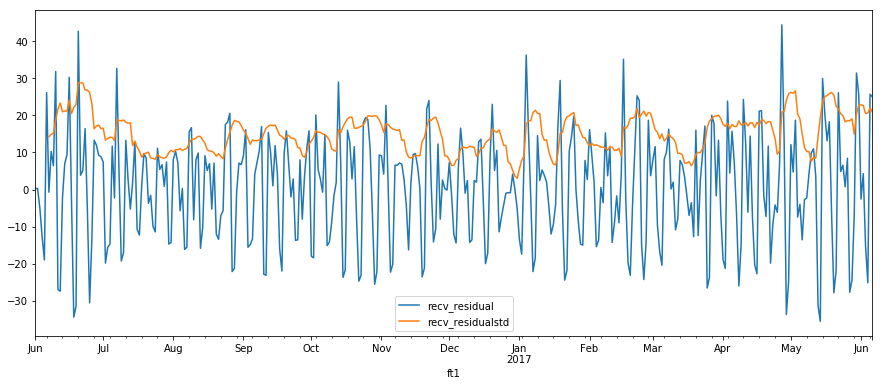

In [47]:
window_size = 7
pdf4['recv_ma'] = moving_average(pdf4['xrecv'], window_size)
pdf4['recv_residual'] = pdf4['xrecv'] - pdf4['recv_ma']
# pdf4.plot(figsize=(15,6), y=['xrecv', 'recvd_ma', 'recv_residual'])
pdf4['recv_residualstd'] = pdf4['recv_residual'].rolling(window=window_size).std()
pdf4.plot(figsize=(15,6), y=['recv_residual','recv_residualstd'])
# ma = moving_average()

In [48]:
pad.__version__

u'0.19.2'

In [49]:
np.__version__

'1.12.0'

In [50]:
pdf4.ix[window_size - 1]

xrecv               33.000000
xsent               16.000000
recv_ma             33.714286
recv_residual       -0.714286
recv_residualstd    14.232452
Name: 2016-06-07 00:00:00, dtype: float64

In [51]:
pdf4.head(-1)

,xrecv,xsent,recv_ma,recv_residual,recv_residualstd
ft1,,,,,
2016-06-01,1.0,1.0,0.714286,0.285714,NaN
2016-06-02,1.0,1.0,0.714286,0.285714,NaN
2016-06-03,3.0,1.0,8.000000,-5.000000,NaN
2016-06-04,0.0,0.0,12.714286,-12.714286,NaN
2016-06-05,0.0,0.0,19.000000,-19.000000,NaN
2016-06-06,51.0,20.0,24.857143,26.142857,NaN
2016-06-07,33.0,16.0,33.714286,-0.714286,14.232452
2016-06-08,45.0,15.0,34.714286,10.285714,14.929930
2016-06-09,42.0,11.0,35.571429,6.428571,15.135636


In [55]:
pdf4['recv_residualstd'] = pdf4['recv_residualstd'].replace(np.nan, pdf4['recv_residualstd'].ix[window_size - 1])

In [59]:
agg_residual_std = np.std(pdf4['recv_residual'])
agg_residual_mean = np.mean(pdf4['recv_residual'])


In [60]:
print agg_residual_mean, agg_residual_std

0.0881786676935 14.8830556021


In [78]:
sigma = 2.0
# pdf4['recv_anamolous_1'] = pdf4[ ( pdf4['xrecv'] > (pdf4['recv_ma'] + (sigma * pdf4['recv_residualstd'])) ) | (pdf4['xrecv'] < (pdf4['recv_ma'] - (sigma * pdf4['recv_residualstd'])) ) ]
pdf4['recv_anamolous'] =  (pdf4['xrecv'] > pdf4['recv_ma'] + sigma * pdf4['recv_residualstd'] ) | ( pdf4['xrecv'] < (pdf4['recv_ma'] - (sigma * pdf4['recv_residualstd']))) 

In [79]:
pdf4.drop('recv_anamolous_1', axis=1, inplace=True)

In [81]:
pdf4.head(10)

,xrecv,xsent,recv_ma,recv_residual,recv_residualstd,recv_anamolous
ft1,,,,,,
2016-06-01,1.0,1.0,0.714286,0.285714,14.232452,False
2016-06-02,1.0,1.0,0.714286,0.285714,14.232452,False
2016-06-03,3.0,1.0,8.000000,-5.000000,14.232452,False
2016-06-04,0.0,0.0,12.714286,-12.714286,14.232452,False
2016-06-05,0.0,0.0,19.000000,-19.000000,14.232452,False
2016-06-06,51.0,20.0,24.857143,26.142857,14.232452,False
2016-06-07,33.0,16.0,33.714286,-0.714286,14.232452,False
2016-06-08,45.0,15.0,34.714286,10.285714,14.929930,False
2016-06-09,42.0,11.0,35.571429,6.428571,15.135636,False


In [82]:
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 1000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].iterkeys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].itervalues(), dtype=float,
                                            count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*", markersize=12)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

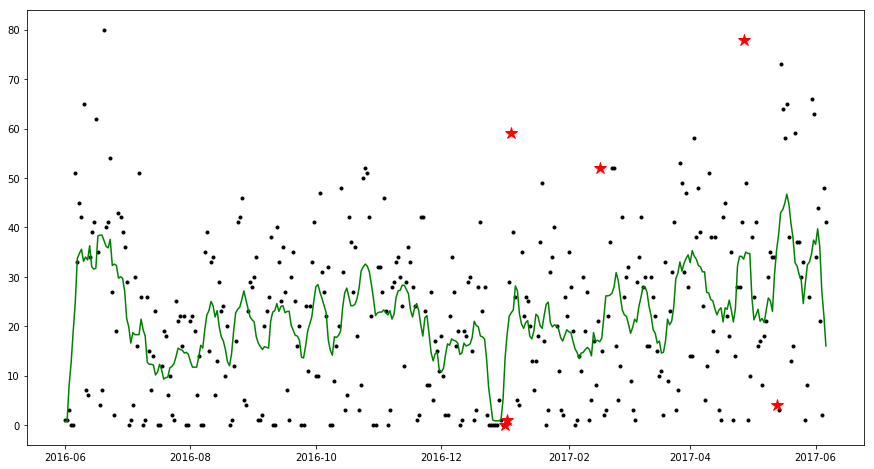

In [93]:
# 4. Lets play with the functions
# x = data_as_frame['Months']
# Y = data_as_frame['SunSpots']

# plot the results
# plot_results(x, y=Y, window_size=10, text_xlabel="Months", sigma_value=3,
#              text_ylabel="No. of Sun spots")
# events = explain_anomalies(y, window_size=5, sigma=3)

plt.figure(figsize=(15, 8))
x_axis_data = pdf4.index.values
y_xrecv_data = pdf4['xrecv']
y_xrecv_ma_data = pdf4['recv_ma']
plt.plot(x_axis_data, y_xrecv_data, "k.")
plt.plot(x_axis_data, y_xrecv_ma_data, color='green')
# col = np.where(pdf4['recv_anamolous'],'k',np.where(y<5,'b','r'))
anomalous_data = pdf4[pdf4['recv_anamolous']]
x_anomalous = anomalous_data.index.values
y_anomalous = anomalous_data['xrecv']
plt.plot(x_anomalous, y_anomalous, "r*", markersize=12)

# Display the anomaly dict
# print("Information about the anomalies model:{}".format(events))

In [91]:
anomalous_data

,xrecv,xsent,recv_ma,recv_residual,recv_residualstd,recv_anamolous
ft1,,,,,,
2017-01-01,0.0,0.0,13.571429,-13.571429,5.591365,True
2017-01-02,1.0,2.0,18.428571,-17.428571,7.859616,True
2017-01-04,59.0,16.0,22.714286,36.285714,17.696557,True
2017-02-16,52.0,8.0,16.857143,35.142857,16.874026,True
2017-04-27,78.0,11.0,33.571429,44.428571,20.902546,True
2017-05-13,4.0,1.0,35.285714,-31.285714,14.332271,True
